In [1]:
import pandas as pd

In [2]:
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
5,"1,1-Dichloroethane",-1.290,-1.576,CC(Cl)Cl
6,"1,1-Dichloroethylene",-1.640,-1.939,ClC(=C)Cl
7,"1,1-Diethoxyethane",-0.430,-0.899,CCOC(C)OCC
8,"1,2,3,4-Tetrachlorobenzene",-4.570,-4.546,Clc1ccc(Cl)c(Cl)c1Cl
9,"1,2,3,4-Tetrahydronapthalene",-4.370,-3.447,C1CCc2ccccc2C1


In [3]:
sol.SMILES.head(5)


0         ClCC(Cl)(Cl)Cl
1           CC(Cl)(Cl)Cl
2         ClC(Cl)C(Cl)Cl
3             ClCC(Cl)Cl
4    FC(F)(Cl)C(F)(Cl)Cl
Name: SMILES, dtype: object

In [4]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
from rdkit.Chem import Descriptors3D
from rdkit.Chem import Descriptors

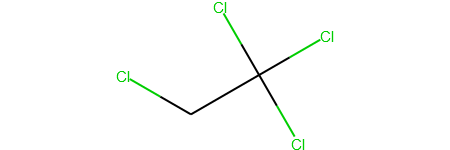

In [5]:
z = Chem.MolFromSmiles(sol.SMILES[0])
z

In [7]:
z.GetNumAtoms()

6

In [8]:
#Calculate molecular descriptors in rdkit

mol_list= []
for element in sol.SMILES:
    mol = Chem.MolFromSmiles(element)
    mol_list.append(mol)
    
len(mol_list)

1144

In [9]:
mol_list2 = [Chem.MolFromSmiles(element) for element in sol.SMILES]
len(mol_list2)

1144

In [12]:
import numpy as np 

In [13]:
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [14]:


df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
5,1.81000,98.960,0.0
6,1.93520,96.944,0.0
7,1.40540,118.176,4.0
8,4.30020,215.894,0.0
9,2.56540,132.206,0.0


In [21]:
#Aromatic proportion
#Number of aromatic atoms Here, we will create a custom function to calculate 
#the Number of aromatic atoms. With this descriptor we can use it to 
#subsequently calculate the AP descriptor.Computing for a single molecule

m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]